In [ ]:
!pip install --quiet accelerate transformers diffusers better_profanity mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00


In [ ]:
model="dreamlike-art/dreamlike-photoreal-2.0"

In [ ]:
from diffusers import EulerAncestralDiscreteScheduler as EDA


In [ ]:
schd=EDA.from_pretrained(model,subfolder="scheduler")

In [ ]:
from diffusers import StableDiffusionPipeline as sdp
dev="cuda"

pipe=sdp.from_pretrained(model,schdulers=schd)
pipe =pipe.to(dev)

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Keyword arguments {'schdulers': EulerAncestralDiscreteScheduler {
  "_class_name": "EulerAncestralDiscreteScheduler",
  "_diffusers_version": "0.18.2",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "linspace",
  "trained_betas": null
}
} are not expected by StableDiffusionPipeline and will be ignored.


In [ ]:
from better_profanity import Profanity
def has_profanity(text):
  return Profanity().contains_profanity(text)

def filter_text(text):
  while has_profanity(text):
    text=input("Enter an Alternate Prompt : ")
  return text

In [ ]:
prompt = input("Enter Your Prompt: ")
flt_input=filter_text(prompt)

Enter Your Prompt: shit
Enter an Alternate Prompt : baigan


In [ ]:
import mediapy as mp
num_images = 4

images=pipe(
    flt_input,
    height=512,
    width=512,
    num_inference_steps=50,
    guidance_scale=8,
    num_images_per_prompt=num_images
).images



  0%|          | 0/50 [00:00<?, ?it/s]

,,,

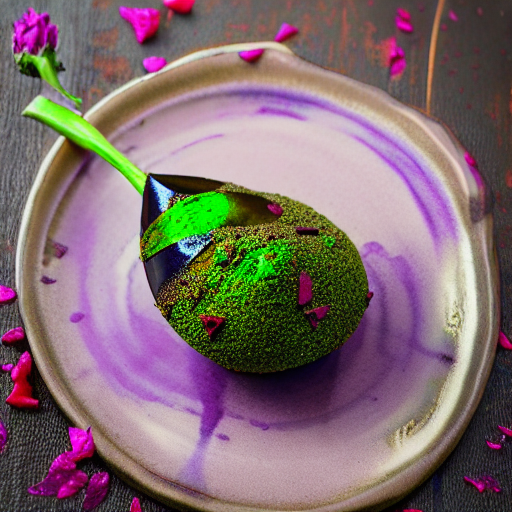
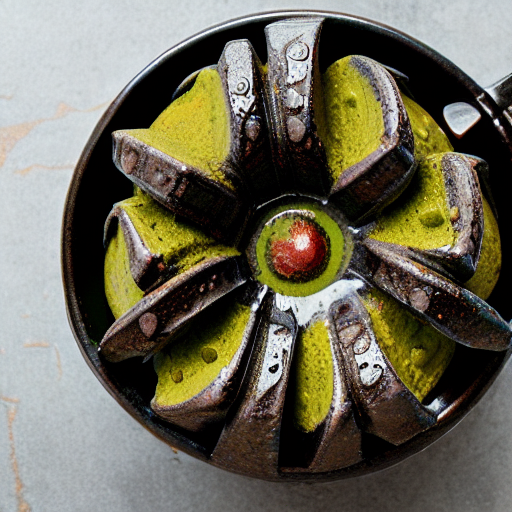
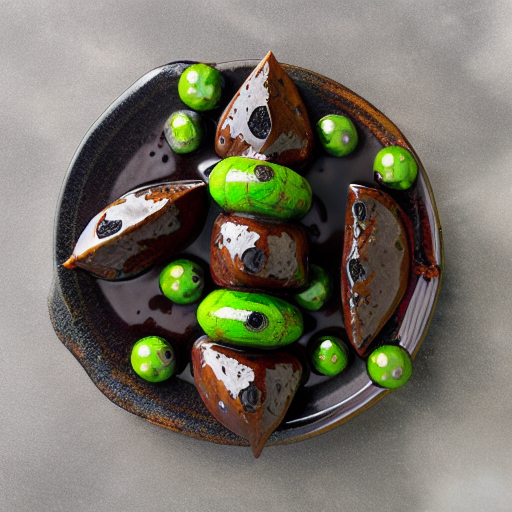
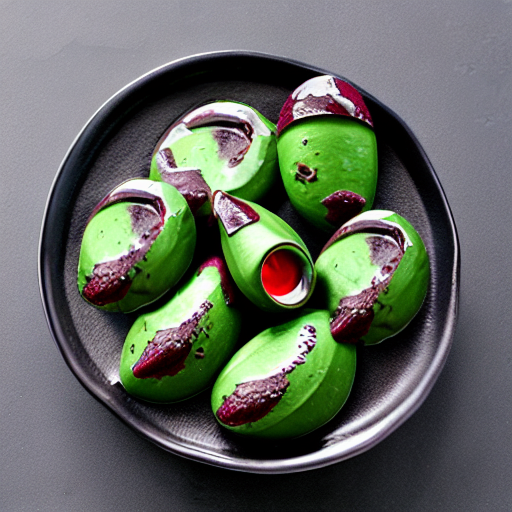

In [ ]:
mp.show_image(images)